----
#### 30 Examples to Master Pandas
  - A comprehensive practical guide for learning Pandas
  - https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4
----

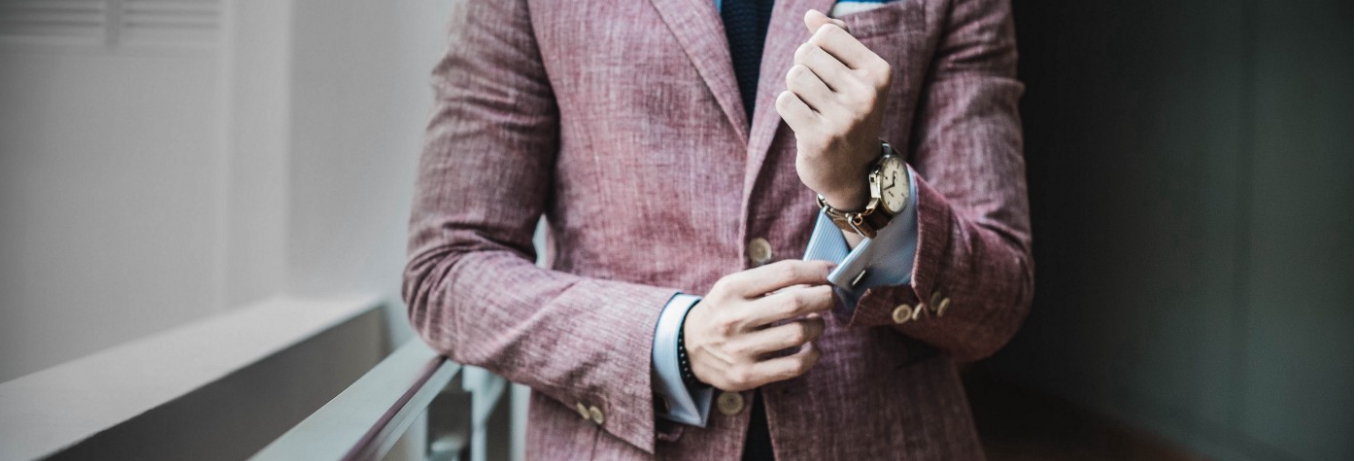

----
####
----

----
#### 0.  a customer churn dataset that is available on Kaggle.
  - https://www.kaggle.com/shubh0799/churn-modelling/Churn_Modelling.csv
----

In [1]:
import numpy as np
import pandas as pd

In [2]:
#"https://www.kaggle.com/shubh0799/churn-modelling/Churn_Modelling.csv"
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape, df.dtypes

((10000, 14),
 RowNumber            int64
 CustomerId           int64
 Surname             object
 CreditScore          int64
 Geography           object
 Gender              object
 Age                  int64
 Tenure               int64
 Balance            float64
 NumOfProducts        int64
 HasCrCard            int64
 IsActiveMember       int64
 EstimatedSalary    float64
 Exited               int64
 dtype: object)

In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


----
#### 1. Dropping columns
  - The drop function is used to drop columns and rows. We pass the labels of rows or columns to be dropped.
----

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace=True)
df.shape

(10000, 10)

In [6]:
df.shape, df.columns

((10000, 10),
 Index(['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'))

----
#### 2. Select particular columns while reading
----

In [7]:
df_spec = pd.read_csv("Churn_Modelling.csv", usecols=['Gender', 'Age', 'Tenure', 'Balance'])
print(df_spec.shape)
df_spec.head()

(10000, 4)


,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


----
#### 3. Reading a part of the dataframe
----

In [8]:
df_partial = pd.read_csv("Churn_Modelling.csv", nrows=5000)
print(df_partial.shape)
df_partial.tail()

(5000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4995,4996,15583480,Morgan,807,France,Female,36,4,0.00,2,0,1,147007.33,0
4996,4997,15620341,Nwebube,500,Germany,Male,44,9,160838.13,2,1,0,196261.64,0
4997,4998,15613886,Trevisan,722,Spain,Male,43,1,0.00,1,1,0,44560.17,1
4998,4999,15792916,Ositadimma,559,Spain,Female,40,7,144470.77,1,1,1,18917.95,0
4999,5000,15710408,Cunningham,584,Spain,Female,38,3,0.00,2,1,1,4525.40,0


----
#### 4. Sample
  - n: The number of rows in the sample
  - frac: The ratio of the sample size to the whole dataframe size
----

In [9]:
df_sample = df.sample(n=1000)
print(df_sample.shape)
df_sample.head()

(1000, 10)


,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5588,France,Female,35,6,133489.12,2,1,1,78101.29,0
8908,Spain,Male,32,10,158537.42,1,1,0,166850.57,0
6511,France,Female,50,4,143054.56,1,0,1,109608.81,1
850,Germany,Male,46,1,170826.55,2,1,0,45041.32,0
8899,France,Female,41,3,0.00,2,1,1,160095.48,0


In [10]:
df_sample = df.sample(frac=0.1)
print(df_sample.shape)
df_sample.head()

(1000, 10)


,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7501,France,Female,58,8,93173.88,1,1,1,139761.25,0
1150,France,Female,27,6,137963.07,1,0,0,8996.79,0
8897,France,Male,51,8,186825.57,1,1,0,93739.71,1
5370,France,Male,41,6,0.00,2,0,1,134158.09,1
2750,France,Female,57,9,0.00,3,1,1,169719.35,1


----
#### 5. Checking the missing values
----

In [11]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

----
#### 6. Adding missing values using loc and iloc
  - loc: selects with label
  - iloc: selects with index
----

In [12]:
missing_index = np.random.randint(10000, size=20)
missing_index

array([1626,  660, 4614, 4831, 8252, 1146, 6177, 4323, 2904, 5382,  617,
       5354, 4943, 6682, 9690, 8087, 4340, 1943, 6368, 9361])

In [13]:
df.loc[missing_index, ['Balance','Geography']] = np.nan

In [14]:
df.iloc[missing_index, -1] = np.nan # Exited column

In [15]:
df.iloc[missing_index, [-1]].head()

,Exited
1626,NaN
660,NaN
4614,NaN
4831,NaN
8252,NaN


In [16]:
df.loc[missing_index, ['Balance','Geography', 'Exited']]

,Balance,Geography,Exited
1626,NaN,NaN,NaN
660,NaN,NaN,NaN
4614,NaN,NaN,NaN
4831,NaN,NaN,NaN
8252,NaN,NaN,NaN
1146,NaN,NaN,NaN
6177,NaN,NaN,NaN
4323,NaN,NaN,NaN
2904,NaN,NaN,NaN
5382,NaN,NaN,NaN


In [17]:
df.isna().sum()  # Geography, Balance, Exited are np.nan

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

----
#### 7. Filling missing values
----

In [18]:
df["Geography"].value_counts()  # France is 5005

France     5006
Germany    2503
Spain      2471
Name: Geography, dtype: int64

In [19]:
mode = df['Geography'].value_counts().index[0]
mode

'France'

In [20]:
df['Geography'].fillna(value=mode, inplace=True)

In [21]:
df["Geography"].value_counts()  # France is 5025

France     5026
Germany    2503
Spain      2471
Name: Geography, dtype: int64

In [22]:
avg = round(df['Balance'].mean(), 2)
print(avg)
df['Balance'].fillna(value=avg, inplace=True)

76449.02


In [23]:
df.loc[missing_index, ['Balance','Geography']] # Balance is mean, Geography is France

,Balance,Geography
1626,76449.02,France
660,76449.02,France
4614,76449.02,France
4831,76449.02,France
8252,76449.02,France
1146,76449.02,France
6177,76449.02,France
4323,76449.02,France
2904,76449.02,France
5382,76449.02,France


----
#### 8. Dropping missing values
  - Another way to handle missing values is to drop them. There are still missing values in the “Exited” column. The following code will drop rows that have any missing value.
----

In [24]:
df.loc[missing_index, ['Exited']]

,Exited
1626,NaN
660,NaN
4614,NaN
4831,NaN
8252,NaN
1146,NaN
6177,NaN
4323,NaN
2904,NaN
5382,NaN


In [25]:
df.dropna(axis=0, how='any', inplace=True)

In [26]:
try:
    df.loc[missing_index, ['Exited']]
except Exception as e:
    print(e)

"None of [Int64Index([1626,  660, 4614, 4831, 8252, 1146, 6177, 4323, 2904, 5382,  617,\n            5354, 4943, 6682, 9690, 8087, 4340, 1943, 6368, 9361],\n           dtype='int64')] are in the [index]"


----
#### 9. Selecting rows based on conditions
----

In [27]:
france_churn = df[ (df["Geography"] == 'France') & (df["Exited"] == 1) ] 
france_churn

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
35,France,Female,45,0,134264.04,1,1,0,27822.99,1.0
41,France,Female,51,8,122522.32,1,0,0,181297.65,1.0
43,France,Female,49,2,131394.56,1,0,0,194365.76,1.0
...,...,...,...,...,...,...,...,...,...,...
9920,France,Female,49,3,204510.94,1,0,1,738.88,1.0
9947,France,Male,34,1,83503.11,2,1,1,73124.53,1.0
9956,France,Female,46,10,85216.61,1,1,0,117369.52,1.0
9991,France,Female,53,4,88381.21,1,1,0,69384.71,1.0


In [28]:
france_churn = df.query("Geography == 'France' & Exited == 1")
france_churn

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
35,France,Female,45,0,134264.04,1,1,0,27822.99,1.0
41,France,Female,51,8,122522.32,1,0,0,181297.65,1.0
43,France,Female,49,2,131394.56,1,0,0,194365.76,1.0
...,...,...,...,...,...,...,...,...,...,...
9920,France,Female,49,3,204510.94,1,0,1,738.88,1.0
9947,France,Male,34,1,83503.11,2,1,1,73124.53,1.0
9956,France,Female,46,10,85216.61,1,1,0,117369.52,1.0
9991,France,Female,53,4,88381.21,1,1,0,69384.71,1.0


In [29]:
france_churn = df.query("Geography == 'France' and Exited == 1")
france_churn

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
35,France,Female,45,0,134264.04,1,1,0,27822.99,1.0
41,France,Female,51,8,122522.32,1,0,0,181297.65,1.0
43,France,Female,49,2,131394.56,1,0,0,194365.76,1.0
...,...,...,...,...,...,...,...,...,...,...
9920,France,Female,49,3,204510.94,1,0,1,738.88,1.0
9947,France,Male,34,1,83503.11,2,1,1,73124.53,1.0
9956,France,Female,46,10,85216.61,1,1,0,117369.52,1.0
9991,France,Female,53,4,88381.21,1,1,0,69384.71,1.0


----
#### 10. Describing the conditions with query
----

In [30]:
df2 = df.query('80_000 < Balance < 100_000')
df2

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
31,France,Male,36,7,85311.70,1,0,1,156731.91,0.0
54,Germany,Male,42,1,98495.72,1,1,0,40014.76,1.0
69,France,Female,21,8,98373.26,1,1,0,18203.00,0.0
80,France,Female,34,1,96645.54,2,0,0,171413.66,0.0
...,...,...,...,...,...,...,...,...,...,...
9965,Germany,Female,33,4,83199.05,1,0,0,159334.93,0.0
9978,France,Male,40,9,93017.47,2,1,0,191608.97,0.0
9979,France,Female,58,1,90022.85,1,0,1,2988.28,0.0
9984,Germany,Male,35,7,90602.42,2,1,1,51695.41,0.0


<AxesSubplot:ylabel='Frequency'>

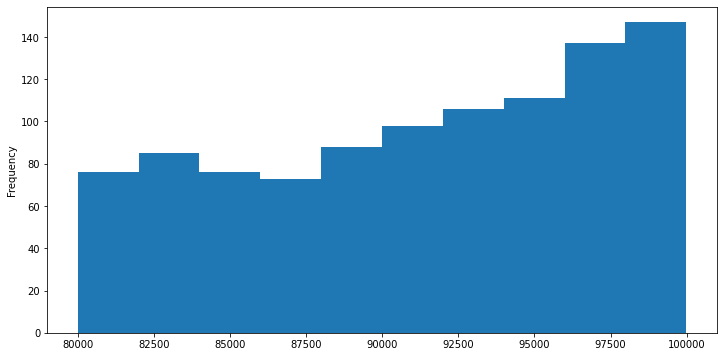

In [31]:
df2['Balance'].plot(kind='hist', figsize=(12,6))

----
#### 11. Describing the conditions with isin
----

In [32]:
df["Tenure"].value_counts().sort_index()

0      411
1     1033
2     1047
3     1004
4      988
5     1011
6      965
7     1026
8     1023
9      983
10     489
Name: Tenure, dtype: int64

In [33]:
condition = df["Tenure"].isin([0,1,2,3,4])
condition

0        True
1        True
2       False
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998     True
9999     True
Name: Tenure, Length: 9980, dtype: bool

In [34]:
df[condition][0:5]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
3,France,Female,39,1,0.00,2,0,0,93826.63,0.0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0


In [35]:
df[condition][0:5].iloc[0:5,]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
3,France,Female,39,1,0.00,2,0,0,93826.63,0.0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0


----
#### 12. The groupby function
----

In [36]:
df_gge = ["Geography", "Gender", "Exited"]
df[df_gge].groupby(["Geography", "Gender"]).mean()

Exited
Geography Gender          
France    Female  0.202924
          Male    0.127319
Germany   Female  0.375630
          Male    0.277989
Spain     Female  0.211592
          Male    0.130780

----
#### 13. Applying multiple aggregate functions with groupby
----

In [37]:
df_gge = ["Geography", "Gender", "Exited"]
df[df_gge].groupby(["Geography", "Gender"]).agg(["mean", "count"])

Exited      
                      mean count
Geography Gender                
France    Female  0.202924  2257
          Male    0.127319  2749
Germany   Female  0.375630  1190
          Male    0.277989  1313
Spain     Female  0.211592  1087
          Male    0.130780  1384

----
#### 14. Applying different aggregate functions to different groups
----

In [38]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg({'Exited':'sum', 'Balance':'mean'})

df_summary.rename(columns={'Exited':'# of churned customers', 
                           'Balance':'Average Balance of Customers'},inplace=True)
df_summary

,# of churned customers,Average Balance of Customers
Geography,,
France,808.0,62106.384195
Germany,812.0,119696.562509
Spain,411.0,61698.160773


In [39]:
df_summary.round(2)

,# of churned customers,Average Balance of Customers
Geography,,
France,808.0,62106.38
Germany,812.0,119696.56
Spain,411.0,61698.16


In [40]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg(
     Number_of_churned_customers = pd.NamedAgg('Exited', 'sum'),
     Average_balance_of_customers = pd.NamedAgg('Balance', 'mean')
)
df_summary

,Number_of_churned_customers,Average_balance_of_customers
Geography,,
France,808.0,62106.384195
Germany,812.0,119696.562509
Spain,411.0,61698.160773


----
#### 15. Reset the index
----

In [41]:
df_new = df[['Geography','Exited','Balance']] \
.groupby(['Geography','Exited']).mean().round(2)

df_new

Balance
Geography Exited           
France    0.0      60357.50
          1.0      71192.79
Germany   0.0     119387.47
          1.0     120340.26
Spain     0.0      59594.81
          1.0      72240.51

In [42]:
df_new = df[['Geography','Exited','Balance']] \
             .groupby(['Geography','Exited']).mean().round(2).reset_index()

df_new

,Geography,Exited,Balance
0,France,0.0,60357.50
1,France,1.0,71192.79
2,Germany,0.0,119387.47
3,Germany,1.0,120340.26
4,Spain,0.0,59594.81
5,Spain,1.0,72240.51


----
#### 16. Reset the index with a drop
----

In [43]:
df_GEB = df[["Geography", "Exited", "Balance"]]
df_GEB.sample(n=6).reset_index()

,index,Geography,Exited,Balance
0,3342,Germany,0.0,134729.99
1,5347,Spain,1.0,0.00
2,6301,Germany,0.0,97652.96
3,9846,Spain,0.0,127728.24
4,5373,Spain,0.0,0.00
5,5123,Spain,0.0,93833.86


In [44]:
df_GEB = df[["Geography", "Exited", "Balance"]]
df_GEB.sample(n=6).reset_index(drop=True)

,Geography,Exited,Balance
0,France,1.0,65971.61
1,Spain,0.0,119656.45
2,Spain,0.0,0.00
3,France,0.0,0.00
4,Germany,1.0,103741.14
5,Spain,0.0,97188.62


----
#### 17. Set a particular column as the index
----

In [45]:
df_new.set_index('Geography')

,Exited,Balance
Geography,,
France,0.0,60357.50
France,1.0,71192.79
Germany,0.0,119387.47
Germany,1.0,120340.26
Spain,0.0,59594.81
Spain,1.0,72240.51


----
#### 18. Inserting a new column
----

In [46]:
group = np.random.randint(10, size=6)
df_new['Group'] = group
df_new

,Geography,Exited,Balance,Group
0,France,0.0,60357.50,2
1,France,1.0,71192.79,5
2,Germany,0.0,119387.47,7
3,Germany,1.0,120340.26,2
4,Spain,0.0,59594.81,0
5,Spain,1.0,72240.51,6


In [47]:
group = np.random.randint(10, size=6)
df_new.insert(0, "Group", group)
df_new

ValueError: cannot insert Group, already exists

----
#### 19. The where function
  - Replace values where the condition is False.
----

In [48]:
df_new['Balance'] = df_new['Balance'].where(df_new['Group'] >= 6, 0)
df_new

,Geography,Exited,Balance,Group
0,France,0.0,0.00,2
1,France,1.0,0.00,5
2,Germany,0.0,119387.47,7
3,Germany,1.0,0.00,2
4,Spain,0.0,0.00,0
5,Spain,1.0,72240.51,6


----
#### 20. The rank function
----

In [49]:
df_new["Rank"] = df_new["Balance"].rank(method="first", ascending=False)

In [50]:
df_new

,Geography,Exited,Balance,Group,Rank
0,France,0.0,0.00,2,3.0
1,France,1.0,0.00,5,4.0
2,Germany,0.0,119387.47,7,1.0
3,Germany,1.0,0.00,2,5.0
4,Spain,0.0,0.00,0,6.0
5,Spain,1.0,72240.51,6,2.0


In [51]:
df_new["Rank"] = df_new["Balance"].rank(method="first", ascending=False).astype(int)
df_new

,Geography,Exited,Balance,Group,Rank
0,France,0.0,0.00,2,3
1,France,1.0,0.00,5,4
2,Germany,0.0,119387.47,7,1
3,Germany,1.0,0.00,2,5
4,Spain,0.0,0.00,0,6
5,Spain,1.0,72240.51,6,2


----
#### 21. Number of unique values in a column
----

In [52]:
df.Geography.value_counts()

France     5006
Germany    2503
Spain      2471
Name: Geography, dtype: int64

In [53]:
df.Geography.value_counts().size         # case 1

3

In [54]:
df.Geography.value_counts().unique()

array([5006, 2503, 2471], dtype=int64)

In [55]:
df.Geography.nunique()                   # this is the same of case 1

3

----
#### 22. Memory usage
----

In [56]:
df.memory_usage()

Index              407520
Geography           79840
Gender              79840
Age                 79840
Tenure              79840
Balance             79840
NumOfProducts       79840
HasCrCard           79840
IsActiveMember      79840
EstimatedSalary     79840
Exited              79840
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9980 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        9980 non-null   object 
 1   Gender           9980 non-null   object 
 2   Age              9980 non-null   int64  
 3   Tenure           9980 non-null   int64  
 4   Balance          9980 non-null   float64
 5   NumOfProducts    9980 non-null   int64  
 6   HasCrCard        9980 non-null   int64  
 7   IsActiveMember   9980 non-null   int64  
 8   EstimatedSalary  9980 non-null   float64
 9   Exited           9980 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.2+ MB


In [58]:
x = df.memory_usage()

In [59]:
type(x)

pandas.core.series.Series

In [60]:
x.values

array([407520,  79840,  79840,  79840,  79840,  79840,  79840,  79840,
        79840,  79840,  79840], dtype=int64)

In [61]:
x.keys()

Index(['Index', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

----
#### 23. The category data type
  - We can save memory by changing its data type as “category”.
----

In [62]:
df.memory_usage()  # Geography           79840

Index              407520
Geography           79840
Gender              79840
Age                 79840
Tenure              79840
Balance             79840
NumOfProducts       79840
HasCrCard           79840
IsActiveMember      79840
EstimatedSalary     79840
Exited              79840
dtype: int64

In [63]:
df["Geography"] = df["Geography"].astype("category")

In [64]:
df.info()  # Geography        9980

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9980 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Geography        9980 non-null   category
 1   Gender           9980 non-null   object  
 2   Age              9980 non-null   int64   
 3   Tenure           9980 non-null   int64   
 4   Balance          9980 non-null   float64 
 5   NumOfProducts    9980 non-null   int64   
 6   HasCrCard        9980 non-null   int64   
 7   IsActiveMember   9980 non-null   int64   
 8   EstimatedSalary  9980 non-null   float64 
 9   Exited           9980 non-null   float64 
dtypes: category(1), float64(3), int64(5), object(1)
memory usage: 1.1+ MB


----
#### 24. Replacing values
  - The replace function can be used to replace values in a dataframe.
---

In [65]:
df_new

,Geography,Exited,Balance,Group,Rank
0,France,0.0,0.00,2,3
1,France,1.0,0.00,5,4
2,Germany,0.0,119387.47,7,1
3,Germany,1.0,0.00,2,5
4,Spain,0.0,0.00,0,6
5,Spain,1.0,72240.51,6,2


In [66]:
df_new["Geography"] = df["Geography"].replace("France", "Korea")
df_new

,Geography,Exited,Balance,Group,Rank
0,Korea,0.0,0.00,2,3
1,Spain,1.0,0.00,5,4
2,Korea,0.0,119387.47,7,1
3,Korea,1.0,0.00,2,5
4,Spain,0.0,0.00,0,6
5,Spain,1.0,72240.51,6,2


In [67]:
df_new.dtypes

Geography    category
Exited        float64
Balance       float64
Group           int32
Rank            int32
dtype: object

In [68]:
df_new["Rank"].replace(1, "Top")

0      3
1      4
2    Top
3      5
4      6
5      2
Name: Rank, dtype: object

In [69]:
# We can use a dictionary to do multiple replacements.
rank = {1: "A", 2: "B", 3: "C", 4: "D", 5: "E", 6:"F"}

df_new["Rank"] = df_new["Rank"].replace(rank)
df_new

,Geography,Exited,Balance,Group,Rank
0,Korea,0.0,0.00,2,C
1,Spain,1.0,0.00,5,D
2,Korea,0.0,119387.47,7,A
3,Korea,1.0,0.00,2,E
4,Spain,0.0,0.00,0,F
5,Spain,1.0,72240.51,6,B


----
#### 25. Drawing a histogram
  - Pandas is not a data visualization library but it makes it pretty simple to create basic plots.
----

<AxesSubplot:title={'center':'Customer Balance'}, ylabel='Frequency'>

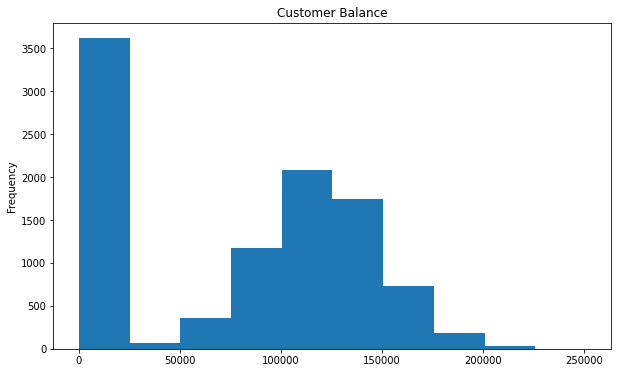

In [70]:
df['Balance'].plot(kind='hist', figsize=(10,6), title='Customer Balance')

<AxesSubplot:title={'center':'Customer Balance'}, ylabel='Frequency'>

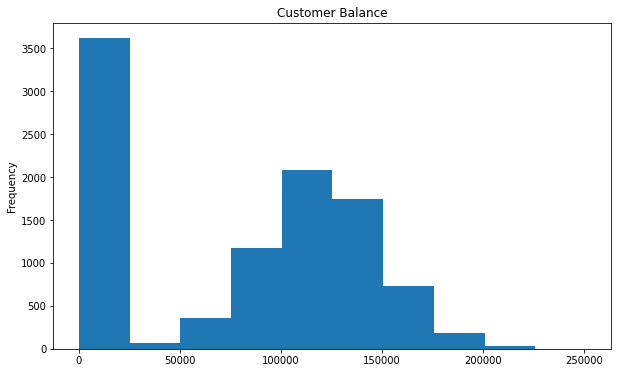

In [71]:
kwargs = {"kind": "hist", "figsize": (10,6), "title": "Customer Balance"}
df['Balance'].plot(**kwargs)

----
#### 26. Reducing the decimal points of floats
----

In [72]:
df_new.round(1) #number of desired decimal points

,Geography,Exited,Balance,Group,Rank
0,Korea,0.0,0.0,2,C
1,Spain,1.0,0.0,5,D
2,Korea,0.0,119387.5,7,A
3,Korea,1.0,0.0,2,E
4,Spain,0.0,0.0,0,F
5,Spain,1.0,72240.5,6,B


----
#### 27. Changing the display options
  - get_option: Returns what the current option is
  - set_option: Changes the option
----

In [73]:
pd.get_option("display.max_rows")

60

In [74]:
# max_colwidth: Maximum number of characters displayed in columns
# max_columns: Maximum number of columns to display
# max_rows: Maximum number of rows to display

pd.set_option("display.precision", 2)

In [75]:
df_new

,Geography,Exited,Balance,Group,Rank
0,Korea,0.0,0.00,2,C
1,Spain,1.0,0.00,5,D
2,Korea,0.0,119387.47,7,A
3,Korea,1.0,0.00,2,E
4,Spain,0.0,0.00,0,F
5,Spain,1.0,72240.51,6,B


----
#### 28. Calculating the percentage change through a column
----

In [76]:
s = pd.Series([1,2,4,8])
s.pct_change()

0    NaN
1    1.0
2    1.0
3    1.0
dtype: float64

In [77]:
s = pd.Series([8,4,2,1])
s.pct_change()

0    NaN
1   -0.5
2   -0.5
3   -0.5
dtype: float64

----
#### 29. Filtering based on strings
----

In [78]:
name = pd.Series(["쪼쪼", "또또", "꾸꾸", "나비", "옹이", "턱시도"])
df_new["Name"] = name
df_new

,Geography,Exited,Balance,Group,Rank,Name
0,Korea,0.0,0.00,2,C,쪼쪼
1,Spain,1.0,0.00,5,D,또또
2,Korea,0.0,119387.47,7,A,꾸꾸
3,Korea,1.0,0.00,2,E,나비
4,Spain,0.0,0.00,0,F,옹이
5,Spain,1.0,72240.51,6,B,턱시도


In [79]:
df_new[df_new["Name"].str.startswith("나")]

,Geography,Exited,Balance,Group,Rank,Name
3,Korea,1.0,0.0,2,E,나비


In [80]:
df_new[df_new["Name"].str.endswith("도")]

,Geography,Exited,Balance,Group,Rank,Name
5,Spain,1.0,72240.51,6,B,턱시도


----
#### 30. Styling a dataframe
----

In [81]:
df_new.style.highlight_max(axis=0, color='darkgreen')

,Geography,Exited,Balance,Group,Rank,Name
0,Korea,0.00,0.00,2,C,쪼쪼
1,Spain,1.00,0.00,5,D,또또
2,Korea,0.00,119387.47,7,A,꾸꾸
3,Korea,1.00,0.00,2,E,나비
4,Spain,0.00,0.00,0,F,옹이
5,Spain,1.00,72240.51,6,B,턱시도


In [82]:
dir(df_new.style)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_applymap',
 '_background_gradient',
 '_bar',
 '_compute',
 '_copy',
 '_display_funcs',
 '_highlight_extrema',
 '_highlight_handler',
 '_highlight_null',
 '_repr_html_',
 '_todo',
 '_translate',
 '_update_ctx',
 'apply',
 'applymap',
 'background_gradient',
 'bar',
 'caption',
 'cell_ids',
 'clear',
 'columns',
 'ctx',
 'data',
 'env',
 'export',
 'format',
 'from_custom_template',
 'hidden_columns',
 'hidden_index',
 'hide_columns',
 'hide_index',
 'highlight_max',
 'highlight_min',
 'highlight_null',
 'index',
 'loader',
 'na_rep',
 'pipe',
 'precision',
 'render',
 'set_caption